In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/actioimbd.csv')
df.shape

(1128, 8)

In [6]:
df.head()

,Genre,Cast,Synopsis,Rating,Runtime,Certificate,Number of Votes,Gross Revenue
0,"Animation, Action, Adventure","Directors:, Joaquim Dos Santos, , Kemp Powers,...","Miles Morales catapults across the Multiverse,...",9.1,140 min,PG,71960,NaN
1,"Action, Adventure, Thriller","Stars:, Arnold Schwarzenegger, , Monica Barbar...",A C.I.A. operative on the edge of retirement d...,6.5,NaN,TV-MA,15422,NaN
2,"Action, Comedy, Crime","Stars:, Bill Hader, , Stephen Root, , Sarah Go...",A hit man from the Midwest moves to Los Angele...,8.4,30 min,TV-MA,101883,NaN
3,"Action, Crime, Thriller","Director:, Chad Stahelski, | , Stars:, Kea...",John Wick uncovers a path to defeating The Hig...,8.0,169 min,R,195078,NaN
4,"Action, Adventure, Crime","Director:, Louis Leterrier, | , Stars:, Vi...",Dom Toretto and his family are targeted by the...,6.3,141 min,PG-13,39326,NaN


In [7]:
df.tail()

,Genre,Cast,Synopsis,Rating,Runtime,Certificate,Number of Votes,Gross Revenue
1123,"Short, Action, Sport","Director:, Philip G. Atwell, | , Stars:, P...","Taking place after The Fast and The Furious, B...",6.0,6 min,Not Rated,5300,NaN
1124,"Action, Crime, Drama","Stars:, Fred Dryer, , Stepfanie Kramer, , Char...",Rick Hunter is a renegade cop who bends the ru...,6.9,48 min,TV-14,5227,NaN
1125,"Action, Sci-Fi, Thriller","Director:, Paul W.S. Anderson, | , Stars:,...",Ex-con Jensen Ames is forced by the warden of ...,6.4,105 min,R,213762,"36,316,032"
1126,"Action, Crime","Director:, Sang-yong Lee, | , Stars:, Lee ...","Seven years after the roundup in Vietnam, Ma S...",7.4,105 min,NaN,102,NaN
1127,"Action, Crime, Drama","Director:, Roger Donaldson, | , Stars:, Ke...",A coverup and witchhunt occur after a politici...,7.1,114 min,R,42893,"35,509,515"


In [8]:
df.describe()

,Rating,Number of Votes
count,1128.000000,1.128000e+03
mean,6.970656,2.362358e+05
std,1.060394,2.871934e+05
min,2.300000,7.600000e+01
25%,6.300000,4.769800e+04
50%,7.000000,1.533630e+05
75%,7.700000,3.135700e+05
max,9.700000,2.721277e+06


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128 entries, 0 to 1127
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Genre            1128 non-null   object 
 1   Cast             1128 non-null   object 
 2   Synopsis         1128 non-null   object 
 3   Rating           1128 non-null   float64
 4   Runtime          1100 non-null   object 
 5   Certificate      1100 non-null   object 
 6   Number of Votes  1128 non-null   int64  
 7   Gross Revenue    669 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 70.6+ KB


In [10]:
df.nunique()

Genre                75
Cast               1123
Synopsis           1128
Rating               65
Runtime             152
Certificate          18
Number of Votes    1128
Gross Revenue       667
dtype: int64

In [11]:
df["Genre"].value_counts()

Action, Adventure, Sci-Fi       113
Action, Adventure, Drama        105
Action, Crime, Drama             98
Animation, Action, Adventure     85
Action, Adventure, Comedy        77
                               ... 
Action, Fantasy                   1
Action, Comedy, War               1
Action, Game-Show, Sport          1
Action, Comedy, Mystery           1
Short, Action, Sport              1
Name: Genre, Length: 75, dtype: int64

In [12]:
df.isnull().sum()

Genre                0
Cast                 0
Synopsis             0
Rating               0
Runtime             28
Certificate         28
Number of Votes      0
Gross Revenue      459
dtype: int64

In [13]:
df.columns

Index(['Genre', 'Cast', 'Synopsis', 'Rating', 'Runtime', 'Certificate',
       'Number of Votes', 'Gross Revenue'],
      dtype='object')

In [14]:
df.duplicated().sum()

0

# **Univariate Analysis:-**

In [16]:
df['Genre'].value_counts().head(10)

Action, Adventure, Sci-Fi       113
Action, Adventure, Drama        105
Action, Crime, Drama             98
Animation, Action, Adventure     85
Action, Adventure, Comedy        77
Action, Adventure, Fantasy       76
Action, Comedy, Crime            45
Action, Thriller                 44
Action, Crime, Thriller          42
Action, Adventure, Thriller      38
Name: Genre, dtype: int64

<Axes: ylabel='Genre'>

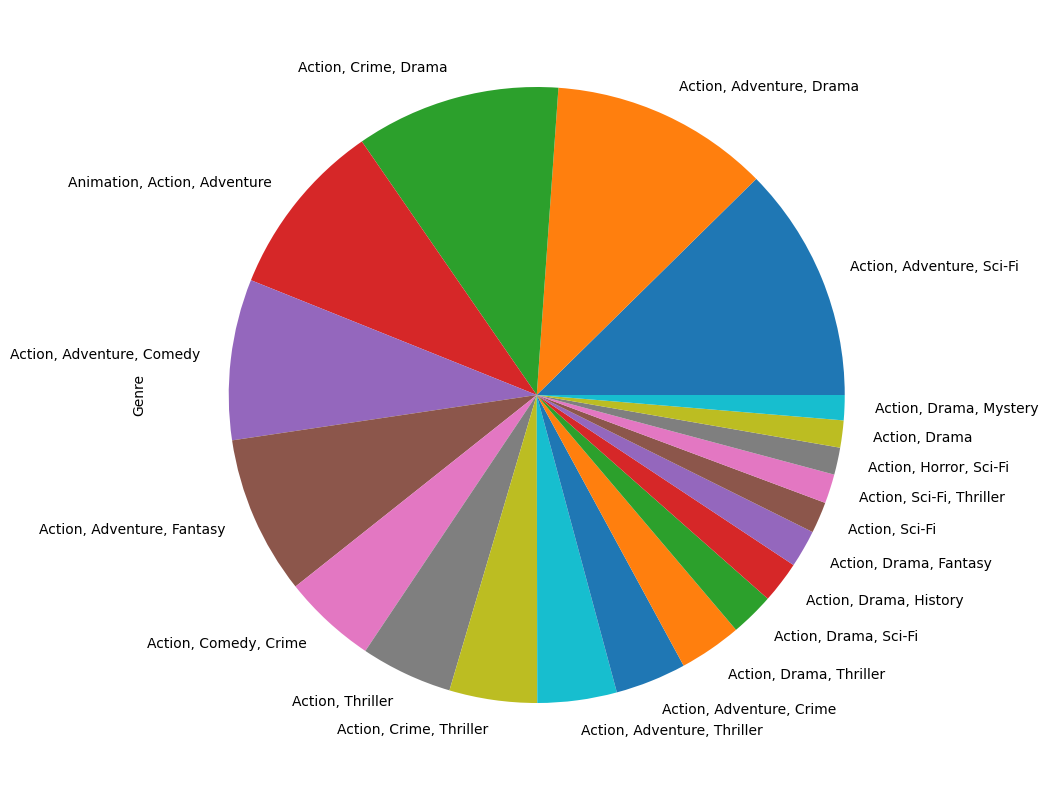

In [24]:
plt.figure(figsize=(10,10))
df['Genre'].value_counts().head(20).plot.pie()

**Insights:-**
In the above pie chart it displays the genre.The slices of pie show the relative size of the data, and it is a type of pictorial representation of data.Each slice of the pie chart represents the type of movie like if its thriller,comedy,adventure or base upon histroric.


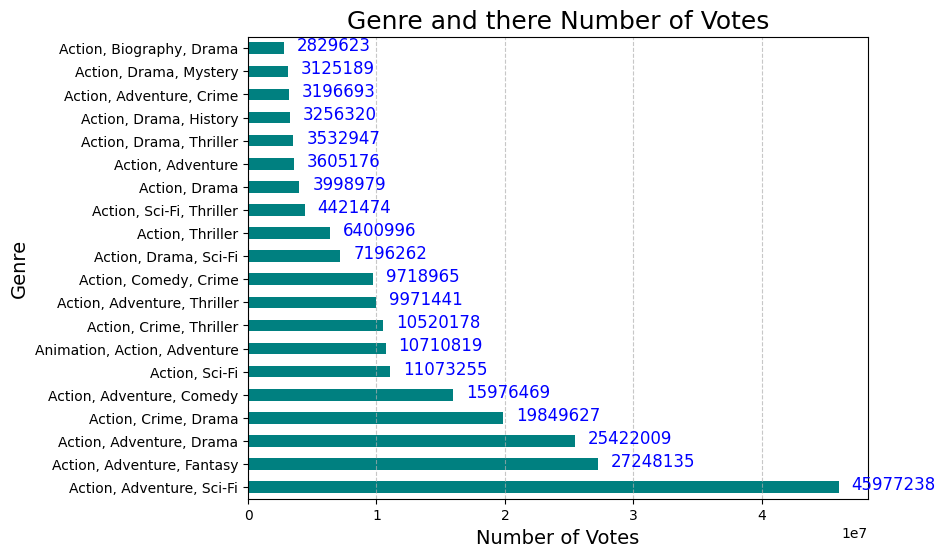

In [26]:
top_genre= df.groupby('Genre')['Number of Votes'].sum().sort_values(ascending=False)[:20]
fig, ax = plt.subplots(figsize=(8, 6))
top_genre.plot(kind='barh', color='teal')
ax.set_title('Genre and there Number of Votes', fontsize=18)
ax.set_xlabel('Number of Votes', fontsize=14)
ax.set_ylabel('Genre', fontsize=14)
ax.grid(axis='x', linestyle='--', alpha=0.7)
for i, v in enumerate(top_genre):
    ax.text(v + 1000000, i - 0.1, str(v), color='blue', fontsize=12)
plt.show()

### **Insights:-**In a univariate analysis, you would typically focus on a single variable at a time and describe its characteristics.

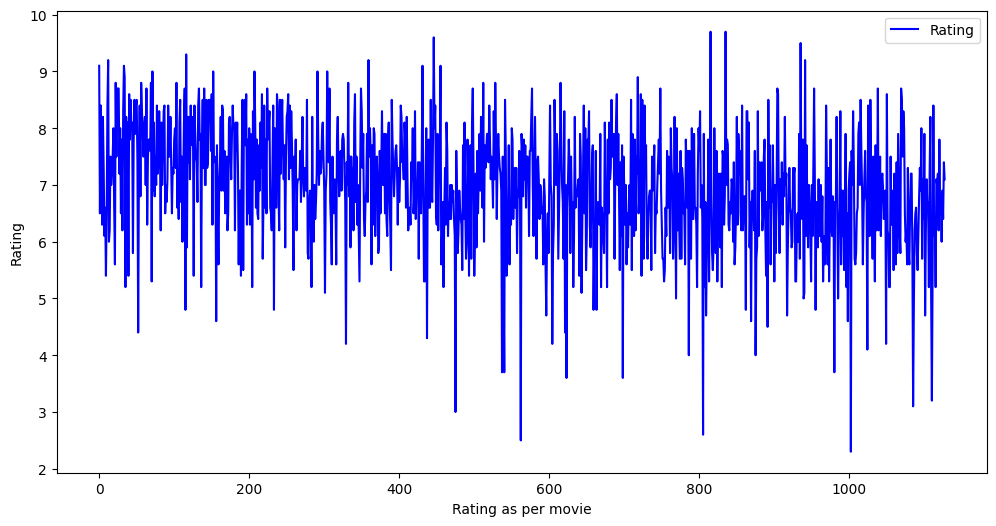

In [55]:
plt.figure(figsize=(12,6))
plt.plot(df['Rating'],color='blue', label='Rating')
plt.xlabel('Rating as per movie')
plt.ylabel('Rating')
plt.legend()
plt.show()

Insights:-The resulting plot shows a line representing the distribution of movie ratings along the y-axis. Each point on the line corresponds to a movie's rating. You can draw the following insights from this plot:
You can observe the distribution of movie ratings across the dataset.
The plot provides a visual representation of how ratings are spread or clustered within the dataset.
You can identify any patterns, outliers, or trends in movie ratings.

## **Bivariate Analysis:**




In [70]:
# Calculate Pearson's correlation coefficient
correlation = df['Number of Votes'].corr(df['Rating'])
print(f"Pearson's Correlation Coefficient: {correlation:.2f}")
plt.show()


Pearson's Correlation Coefficient: 0.29


<ipython-input-71-5710c5dee8b0>:10: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.swarmplot(data=df, x='Genre', y='Rating', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 58.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 39.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 33.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 38.1% of the points cannot be placed; you may want to decrease the size of the mark

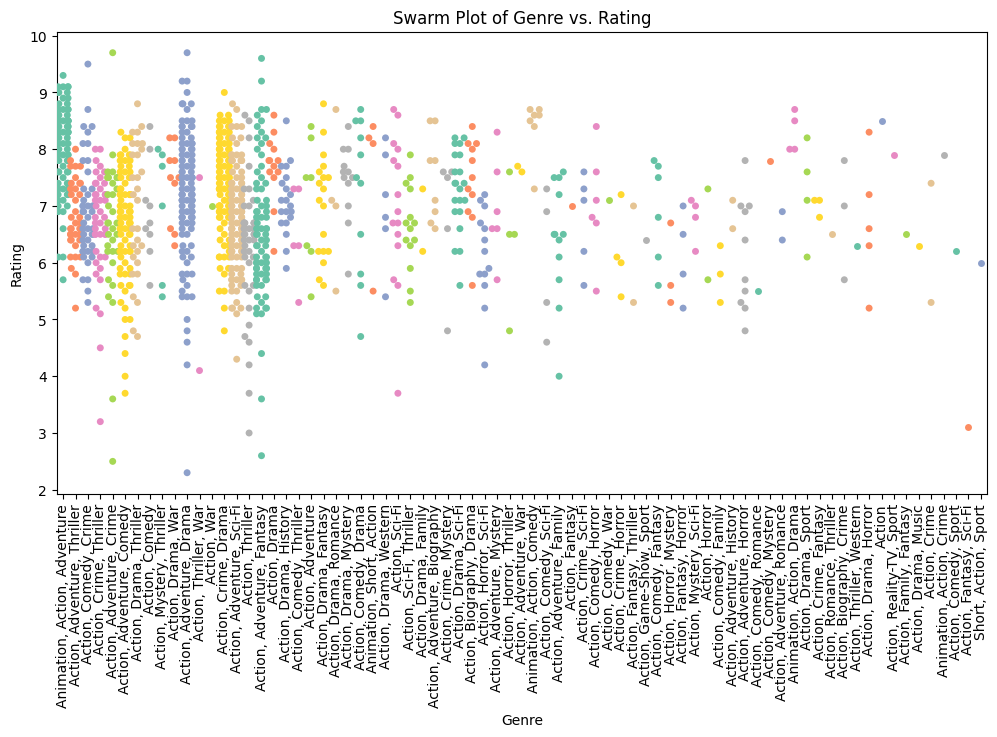

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your IMDb data (replace 'your_data.csv' with your dataset file)
df = pd.read_csv('/content/actioimbd.csv')

# Create a swarm plot
plt.figure(figsize=(12, 6))
sns.swarmplot(data=df, x='Genre', y='Rating', palette='Set2')
plt.title('Swarm Plot of Genre vs. Rating')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability if needed
plt.show()


**Insights:**The swarm plot will display individual data points for each movie's genre and rating, showing how ratings are distributed within each genre category. This can help you visualize the distribution of ratings across different genres and identify any patterns or outliers.

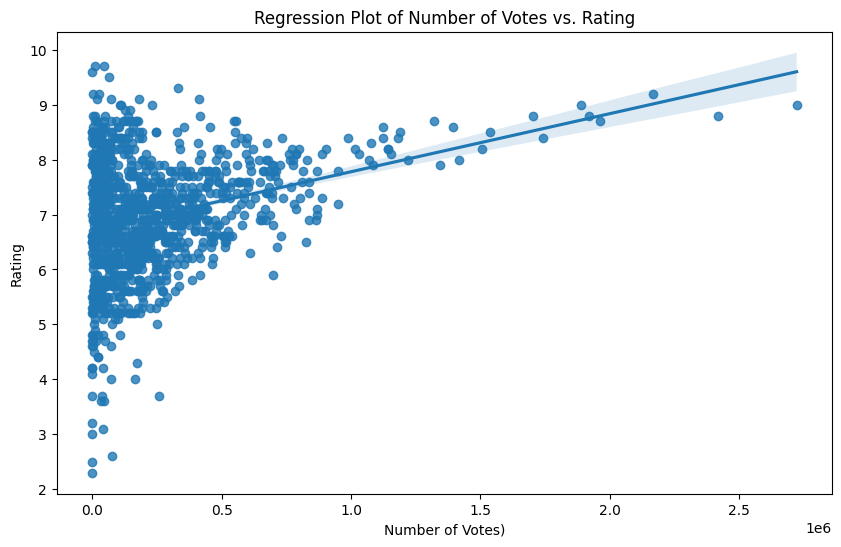

In [54]:
# Regression plot
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='Number of Votes', y='Rating')
plt.title('Regression Plot of Number of Votes vs. Rating')
plt.xlabel('Number of Votes)')
plt.ylabel('Rating')
plt.show()


**Insights**:The resulting regression plot provides several insights into the relationship between the number of votes and movie ratings:
Overall, this plot provides a visual representation of how the number of votes relates to movie ratings and can help you identify trends and patterns in your dataset.

<Axes: title={'center': 'Bar chart for Synopsis and rating'}>

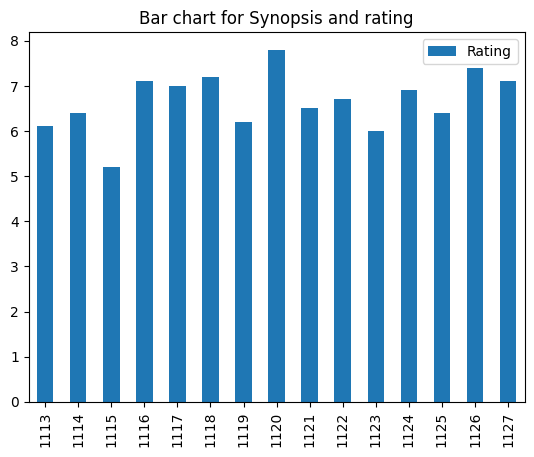

In [48]:
df[['Synopsis','Rating']].tail(15).plot.bar(title='Bar chart for Synopsis and rating')

# **Multivariate Analysis:-**

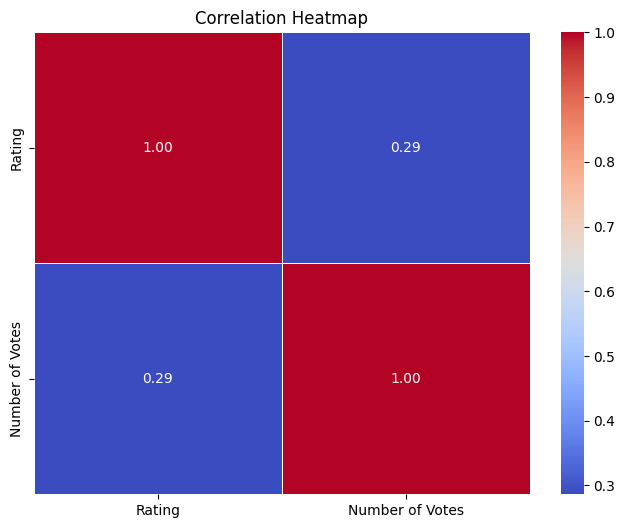

In [28]:
numerics_columns = ["Rating", "Number of Votes"]
correlation_matrix = df[numerics_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# **Insights:**

By examining the heatmap, we can quickly identify whether "Rating" and "Number of Votes" have a positive, negative, or weak correlation. A strong positive correlation suggests that highly rated movies tend to receive more votes, while a strong negative correlation suggests the opposite. A weak correlation suggests that there may not be a strong relationship between these two variables.

If the correlation coefficient is close to 1 or -1, it indicates a strong linear relationship. If it's close to 0, there may not be a linear relationship between the variables.

The heatmap is a helpful tool for identifying potential patterns and relationships in your data and can guide further exploration or analysis.

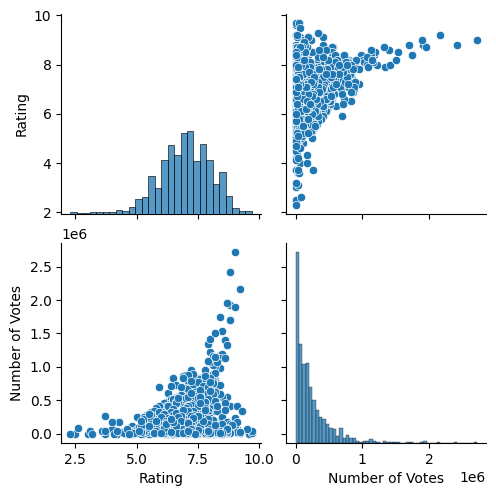

In [60]:
sns.pairplot(df[['Rating', 'Number of Votes']])

**Insights:**Overall, this pairplot is a useful tool for getting a quick visual understanding of the relationship between 'Rating' and 'Number of Votes' in IMDb dataset. It can help identify patterns, trends, and potential outliers in the data.

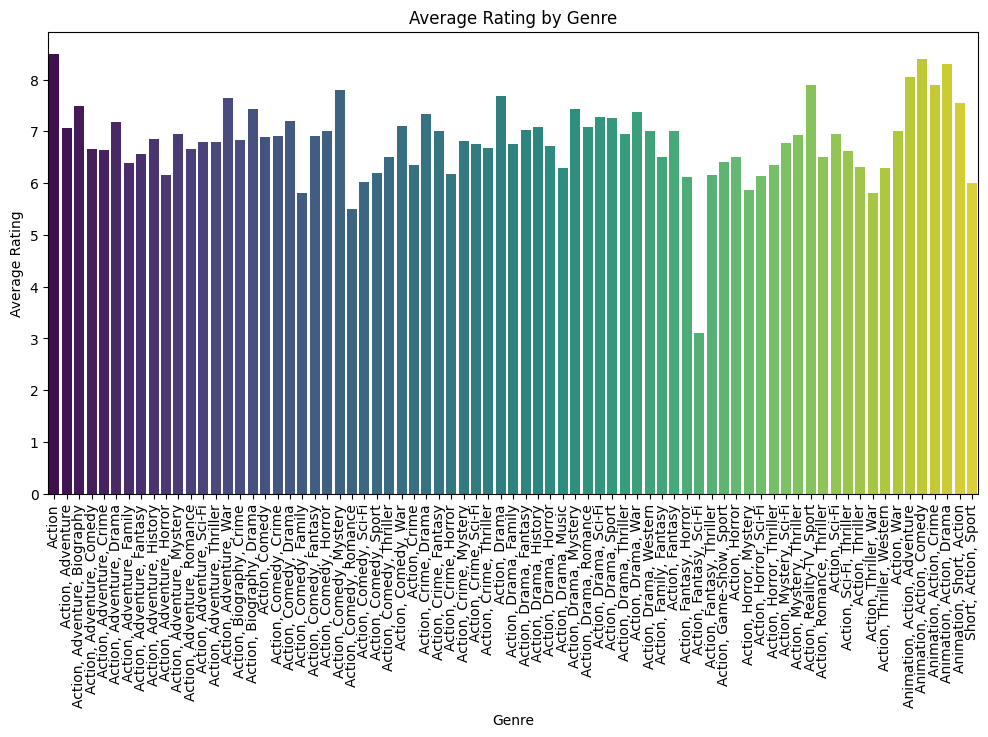

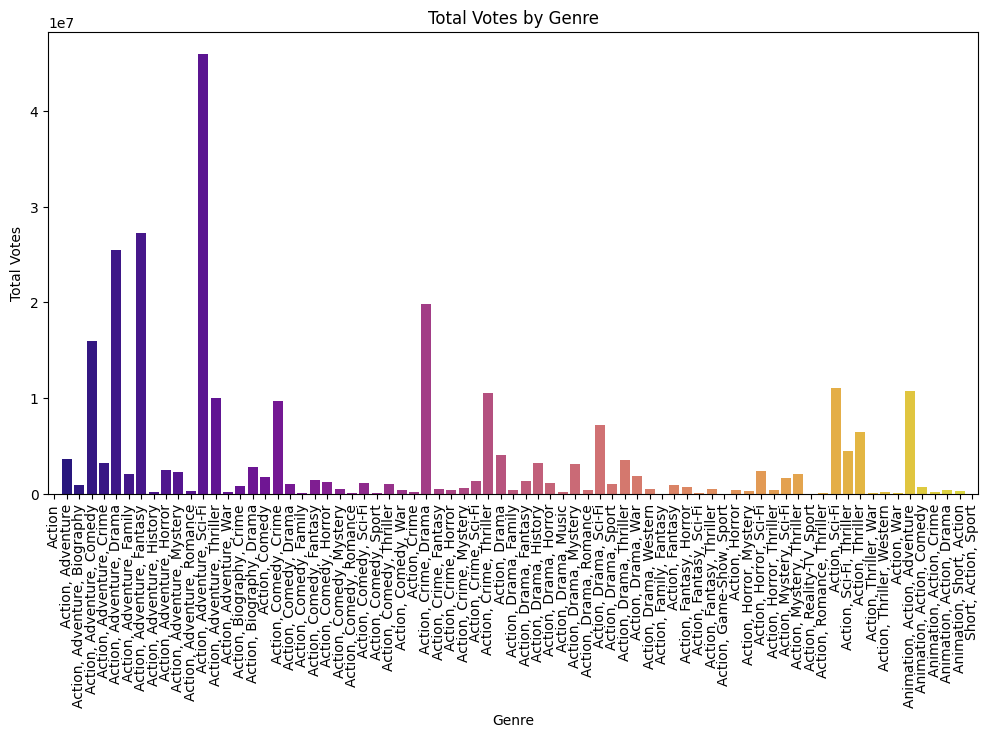

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/actioimbd.csv')
average_ratings_by_genre = df.groupby('Genre')['Rating'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=average_ratings_by_genre, x='Genre', y='Rating', palette='viridis')
plt.title('Average Rating by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()
total_votes_by_genre = df.groupby('Genre')['Number of Votes'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=total_votes_by_genre, x='Genre', y='Number of Votes', palette='plasma')
plt.title('Total Votes by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Votes')
plt.xticks(rotation=90)
plt.show()


### **Insights:**In this code, two examples of multivariate analysis using bar charts are provided:
**Example 1: Average Rating by Genre**
The code calculates the average rating for each movie genre.
It then creates a bar chart showing the average rating on the y-axis and movie genres on the x-axis.
The 'viridis' palette is used to color the bars.

**Example 2: Total Votes by Genre**
The code calculates the total number of votes (popularity) for each movie genre.
It creates a bar chart to visualize the total votes on the y-axis and movie genres on the x-axis.
The 'plasma' palette is used for coloring the bars.
You can customize these examples to suit your specific analysis and research questions. The key is to select the appropriate categorical and numerical variables, group the data accordingly, and use bar charts to visualize the relationships between them.